In [1]:
from skbeam.core import utils
from skbeam.core.roi import circular_average, construct_
import numpy as np


from matplotlib.pyplot import figure, ion, clf, imshow, clim, xlim,ylim, subplot, loglog
%matplotlib inline

In [2]:
# load some example data
npdata = np.load("data/imagefill-data.npz")

#this image was averaged over 10 frames
img = npdata['img']
mask = npdata['mask']
x0 = npdata['XCEN']
y0 = npdata['YCEN']
r0 = y0, x0

In [4]:
sqx, sqy = circular_average(img, r0, mask=mask, min_x=10, max_x = 1400, nx=1300)
cimg = construct_circ_avg_image(sqx, sqy, [y0, x0, img.shape[0], img.shape[1]])
cimg2 = construct_circ_avg_image(sqx, sqy)

NameError: name 'construct_circ_avg_image' is not defined

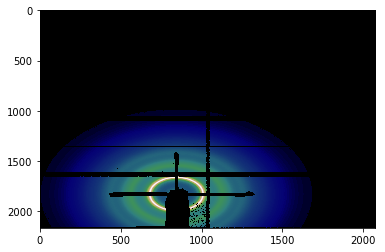

In [5]:
figure(0);clf();
imshow(SIMG)